In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
lossres = np.zeros((3,96,100))

In [3]:
for i in range(96):
    loaded = np.load(f'../outputs/syn-exp-7-{i}.npy')
    #loaded = loaded[:,:,:,:5]
    mean_loss = np.mean(loaded, axis = -1)
    #mean_loss = np.median(loaded, axis = -1)
    min_loss = np.min(mean_loss, axis = -1)
    lossres[:,i,:] = min_loss

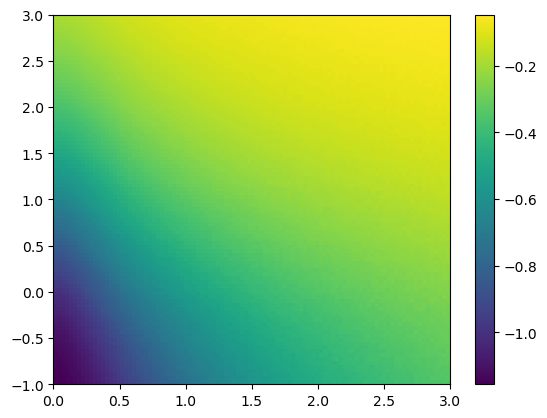

In [4]:
plt.imshow(lossres[0],extent=(0, 3, -1, 3), origin='lower', aspect='auto')
plt.colorbar()

In [5]:
phases = np.zeros((96,100,3), dtype=int)
phases[np.logical_and(lossres[0]<lossres[1], lossres[0]<lossres[2])] = np.array([244, 111, 67]) # adam
phases[np.logical_and(lossres[1]<lossres[0], lossres[1]<lossres[2])] = np.array([128, 166, 226]) # focus
phases[np.logical_and(lossres[2]<lossres[1], lossres[2]<lossres[0])] = np.array([251, 221, 133]) # signum

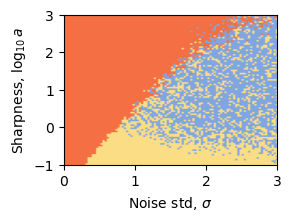

In [6]:
plt.figure(figsize=(2.8, 2.1),constrained_layout=True)
plt.imshow(phases,extent=(0, 3, -1, 3), origin='lower', aspect='auto')
plt.xlabel(r'Noise std, $\sigma$')
plt.ylabel(r'Sharpness, $\log_{10}a$')
plt.savefig('../figures/syn-exp-7-1.pdf')

In [7]:
phases2 = np.zeros((96,100,3), dtype=int)
phases2[lossres[0]<lossres[2]] = np.array([244, 111, 67]) # adam
phases2[lossres[2]<lossres[0]] = np.array([251, 221, 133]) # signum

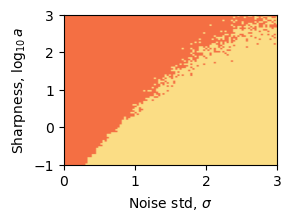

In [8]:
plt.figure(figsize=(2.8, 2.1),constrained_layout=True)
plt.imshow(phases2,extent=(0, 3, -1, 3), origin='lower', aspect='auto',vmax=2)
plt.xlabel(r'Noise std, $\sigma$')
plt.ylabel(r'Sharpness, $\log_{10}a$')
plt.savefig('../figures/syn-exp-7-2.pdf')

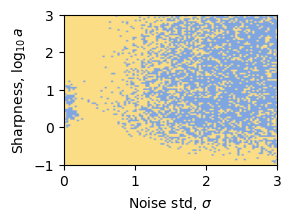

In [11]:
phases3 = np.zeros((96,100,3), dtype=int)
#phases3[lossres[0]<lossres[2]] = np.array([244, 111, 67]) # adam
phases3[lossres[2]<lossres[1]] = np.array([251, 221, 133]) # signum
phases3[lossres[1]<lossres[2]] = np.array([128, 166, 226]) # focus

plt.figure(figsize=(2.8, 2.1),constrained_layout=True)
plt.imshow(phases3,extent=(0, 3, -1, 3), origin='lower', aspect='auto',vmax=2)
plt.xlabel(r'Noise std, $\sigma$')
plt.ylabel(r'Sharpness, $\log_{10}a$')
plt.savefig('../figures/syn-exp-7-3.pdf')

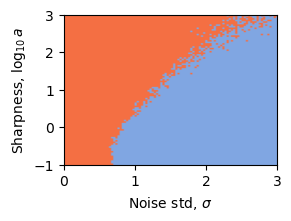

In [12]:
phases4 = np.zeros((96,100,3), dtype=int)
phases4[lossres[0]<lossres[1]] = np.array([244, 111, 67]) # adam
#phases4[lossres[2]<lossres[1]] = np.array([251, 221, 133]) # signum
phases4[lossres[1]<lossres[0]] = np.array([128, 166, 226]) # focus

plt.figure(figsize=(2.8, 2.1),constrained_layout=True)
plt.imshow(phases4,extent=(0, 3, -1, 3), origin='lower', aspect='auto',vmax=2)
plt.xlabel(r'Noise std, $\sigma$')
plt.ylabel(r'Sharpness, $\log_{10}a$')
plt.savefig('../figures/syn-exp-7-4.pdf')